In [1]:
import pandas as pd
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Ridge
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = pd.read_csv("Iris.csv")

In [3]:
ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ds["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
sp = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
ds["Species"] = ds["Species"].map(sp)

In [6]:
array = ds.values

In [7]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [8]:
data_rescaled = data_scaler.fit_transform(array)

In [9]:
print ("\nScaled data:\n", data_rescaled[0:10])


Scaled data:
 [[0.         0.22222222 0.625      0.06779661 0.04166667 0.        ]
 [0.00671141 0.16666667 0.41666667 0.06779661 0.04166667 0.        ]
 [0.01342282 0.11111111 0.5        0.05084746 0.04166667 0.        ]
 [0.02013423 0.08333333 0.45833333 0.08474576 0.04166667 0.        ]
 [0.02684564 0.19444444 0.66666667 0.06779661 0.04166667 0.        ]
 [0.03355705 0.30555556 0.79166667 0.11864407 0.125      0.        ]
 [0.04026846 0.08333333 0.58333333 0.06779661 0.08333333 0.        ]
 [0.04697987 0.19444444 0.58333333 0.08474576 0.04166667 0.        ]
 [0.05369128 0.02777778 0.375      0.06779661 0.04166667 0.        ]
 [0.06040268 0.16666667 0.45833333 0.08474576 0.         0.        ]]


In [10]:
ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [11]:
X = array[:,0:5]
Y = array[:,-1]

GRID SEARCH PARAMETER TUNING

In [12]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)

In [13]:
model = Ridge()
grid = GridSearchCV(model, param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})

In [14]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.3140255997588324
0.0


WITH OUT GRID SEARCH

In [15]:
X_train, X_test, y_train, y_test = train_test_split( 
                        X,Y,test_size = 0.30, random_state = 42) 

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions))

Accuracy :  1.0


WITH GRID SEARCH

In [17]:
print(np.logspace(-3,3,7))

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


In [18]:
param_grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
            "penalty":["l1","l2"]}

In [19]:
model = LogisticRegression()
grid_gs = GridSearchCV(model, param_grid)
grid_gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [20]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_gs.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_gs.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_gs.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=1)

 The best score across ALL searched params:
 1.0

 The best parameters across ALL searched params:
 {'C': 1, 'penalty': 'l2'}


In [21]:
model = LogisticRegression(C= 1, penalty= 'l2')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions))

Accuracy :  1.0


RANDOM SEARCH PARAMETER TUNING

In [22]:
model = LogisticRegression()
grid_rs = RandomizedSearchCV(model, param_grid)
grid_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})

In [23]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n",grid_rs.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_rs.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_rs.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=1)

 The best score across ALL searched params:
 1.0

 The best parameters across ALL searched params:
 {'penalty': 'l2', 'C': 1}


In [24]:
model = LogisticRegression(C= 10, penalty= 'l2')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions))

Accuracy :  1.0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [26]:
ds.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [27]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


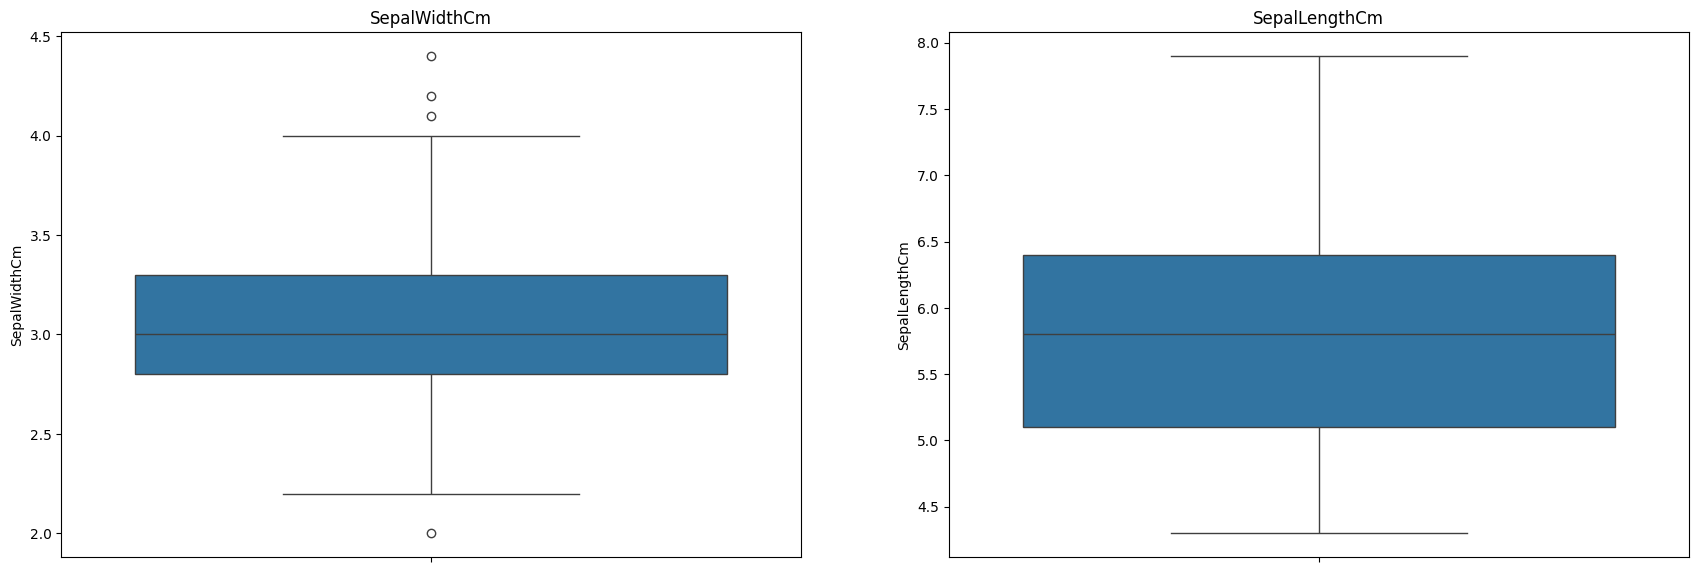

In [28]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=ds.SepalWidthCm)
plt.title("SepalWidthCm")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=ds.SepalLengthCm)
plt.title("SepalLengthCm")

plt.show()

In [29]:
ds.SepalLengthCm.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [30]:
ds.SepalWidthCm.describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

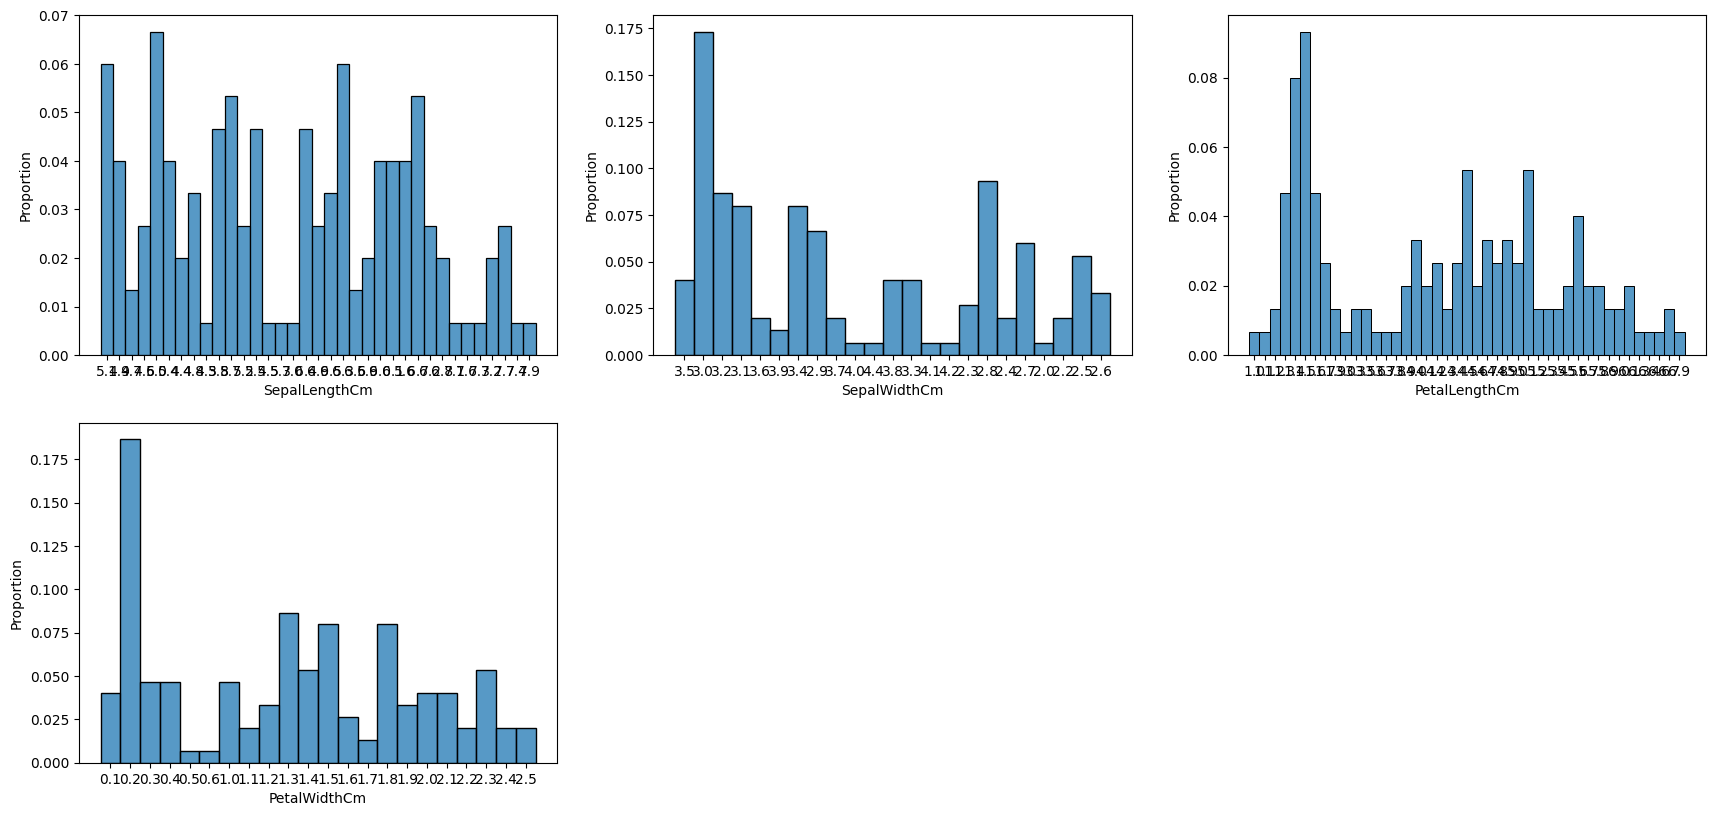

In [31]:
plt.figure(figsize=(21,15))

plt.subplot2grid((3,3), (0,0))
sns.histplot(ds.SepalLengthCm.astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,1))
sns.histplot(ds.SepalWidthCm.astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,2))
sns.histplot(ds.PetalLengthCm.astype(str).sort_values(), stat='proportion')

plt.subplot2grid((3,3), (1,0))
sns.histplot(ds.PetalWidthCm.astype(str).sort_values(), stat='proportion')

plt.show()

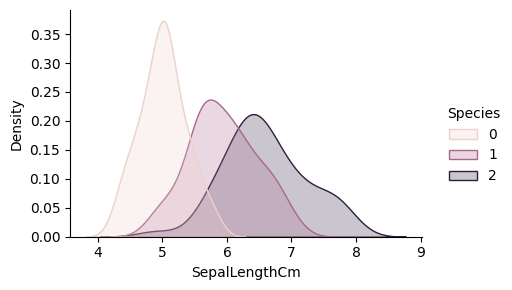

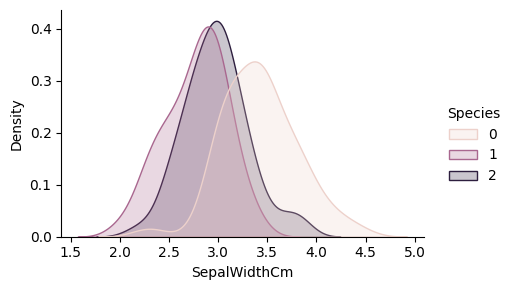

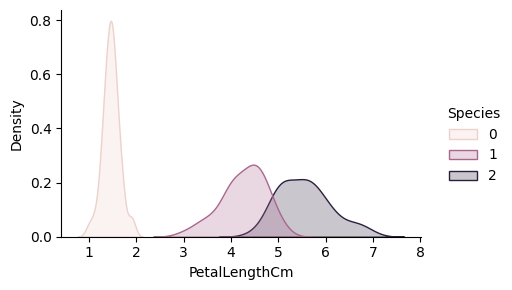

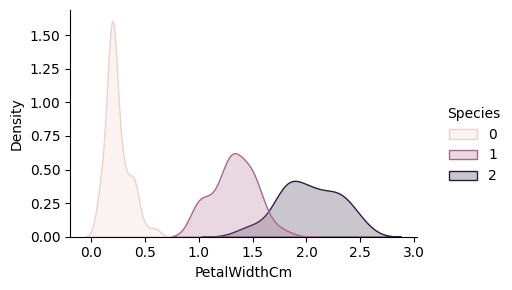

In [32]:
sns.displot(ds, x=ds['SepalLengthCm'], hue="Species", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(ds, x=ds['SepalWidthCm'], hue="Species", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(ds, x=ds['PetalLengthCm'], hue="Species", kind="kde", fill=True, height=3, aspect=1.5)
sns.displot(ds, x=ds['PetalWidthCm'], hue="Species", kind="kde", fill=True, height=3, aspect=1.5)

In [33]:
col_names = ds.columns
features = ds[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns = col_names)
scaled.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,-1.224745


In [34]:
data=scaled[['SepalLengthCm','SepalWidthCm']]
data.head()

,SepalLengthCm,SepalWidthCm
0,-0.900681,1.032057
1,-1.143017,-0.124958
2,-1.385353,0.337848
3,-1.506521,0.106445
4,-1.021849,1.263460


In [35]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(data)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss)

wcss_df.head(15)

,wcss_score,no_of_clusters
0,300.000000,1
1,214.800044,2
2,103.806921,3
3,79.838799,4
4,63.370908,5
5,55.990626,6
6,48.447755,7
7,41.118670,8
8,38.241369,9
9,30.117936,10


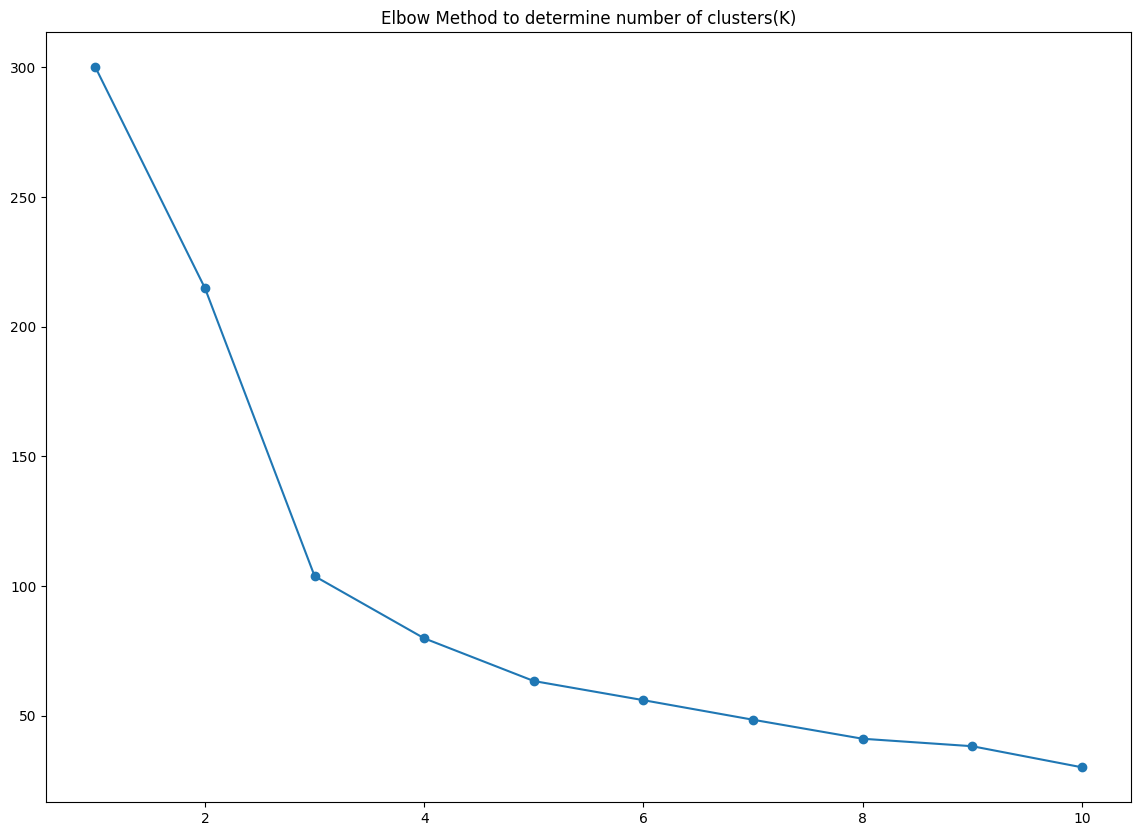

In [36]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

## K Means

In [37]:
kmeans=KMeans(n_clusters=3,random_state=0) 
kmeans.fit(data)

KMeans(n_clusters=3, random_state=0)

In [38]:
prediction=kmeans.fit_predict(data)
prediction

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [39]:
clustered_data = ds.copy()
clustered_data["cluster_index"] = prediction

In [40]:
clustered_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_index
0,1,5.1,3.5,1.4,0.2,0,2
1,2,4.9,3.0,1.4,0.2,0,2
2,3,4.7,3.2,1.3,0.2,0,2
3,4,4.6,3.1,1.5,0.2,0,2
4,5,5.0,3.6,1.4,0.2,0,2
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,1
146,147,6.3,2.5,5.0,1.9,2,0
147,148,6.5,3.0,5.2,2.0,2,1
148,149,6.2,3.4,5.4,2.3,2,1


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

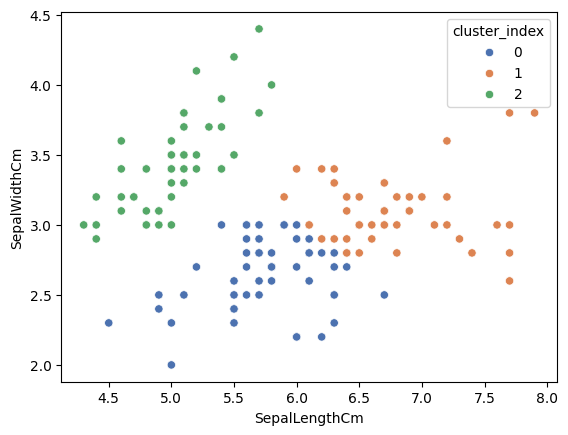

In [41]:
sns.scatterplot(x=clustered_data.SepalLengthCm,
                y=clustered_data.SepalWidthCm,
                hue=clustered_data.cluster_index,
                palette="deep")

## Silhouette Coefficient

In [42]:
score = silhouette_score(ds, clustered_data.cluster_index, random_state=0)
print(f"Silhouette score: {score:0.3f} ~ 0")

Silhouette score: 0.268 ~ 0


## Agglomerative Clustering

In [43]:
agc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

In [44]:
agg_predict = agc.fit_predict(scaled)
score = silhouette_score(scaled, agc.labels_, random_state=0)
print(score)

0.506280256039099


In [45]:
agg_cluster = ds.copy()
agg_cluster["cluster_index"] = agg_predict
agg_cluster.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_index
0,1,5.1,3.5,1.4,0.2,0,1
1,2,4.9,3.0,1.4,0.2,0,1
2,3,4.7,3.2,1.3,0.2,0,1
3,4,4.6,3.1,1.5,0.2,0,1
4,5,5.0,3.6,1.4,0.2,0,1


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

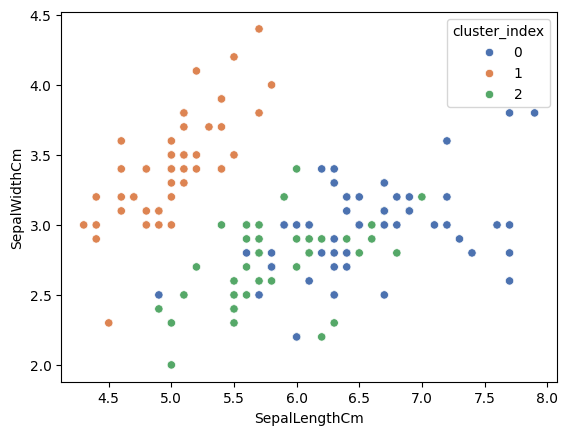

In [46]:
sns.scatterplot(x=agg_cluster.SepalLengthCm,
                y=agg_cluster.SepalWidthCm,
                hue=agg_cluster.cluster_index,
                palette="deep")

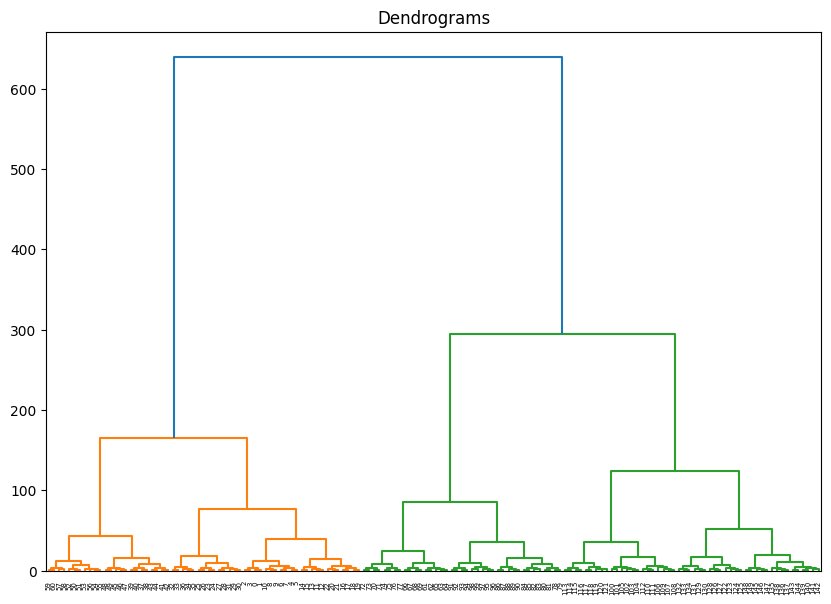

In [47]:
x=agg_cluster.SepalLengthCm
y=agg_cluster.cluster_index

import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(agg_cluster, method='ward'))